In [48]:
print("hello")

hello


In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
filename = 'K8.data'
data = pd.read_csv(filename, header = None, na_values=['?'])
data = data.drop([5409],axis =1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,5399,5400,5401,5402,5403,5404,5405,5406,5407,5408
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.006,0.013,0.021,0.020,0.016,-0.011,0.003,0.010,-0.007,inactive
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,0.002,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,inactive
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inactive
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.019,0.010,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,inactive
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.051,0.012,0.050,0.038,0.051,-0.015,0.017,0.027,-0.049,inactive


In [7]:
data.shape

(16772, 5409)

In [4]:
filepath2 ='data/K8.def'
k8_labels = pd.read_csv(filepath2, header = None, sep = '\t')
k8_labels.drop(index=0, inplace = True)
k8_labels.reset_index(inplace=True)
k8_labels.head()

,index,0,1
0,1,a119e_l125p,inactive
1,2,a119e_r283k_a353v,inactive
2,3,a161t,inactive
3,4,c135y,inactive
4,5,c135y_e285m,inactive


In [5]:
k8_labels.columns

Index(['index', 0, 1], dtype='object')

In [6]:
k8_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16771 entries, 0 to 16770
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   16771 non-null  int64 
 1   0       16771 non-null  object
 2   1       16771 non-null  object
dtypes: int64(1), object(2)
memory usage: 393.2+ KB


In [8]:
dfs = [data,k8_labels]
k8_labeldata = pd.concat(dfs, axis = 1).reindex(data.index)
k8_labeldata.head()

,0,1,2,3,4,5,6,7,8,9,...,5402,5403,5404,5405,5406,5407,5408,index,0,1
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.020,0.016,-0.011,0.003,0.010,-0.007,inactive,1.0,a119e_l125p,inactive
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,0.015,-0.008,-0.011,-0.004,0.013,0.005,inactive,2.0,a119e_r283k_a353v,inactive
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,inactive,3.0,a161t,inactive
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.025,0.021,-0.012,0.006,0.016,-0.018,inactive,4.0,c135y,inactive
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.038,0.051,-0.015,0.017,0.027,-0.049,inactive,5.0,c135y_e285m,inactive


In [9]:
k8_labeldata = k8_labeldata.drop(k8_labeldata.iloc[:, [5409]], axis = 1)
k8_labeldata.head()

,0,1,2,3,4,5,6,7,8,9,...,5401,5402,5403,5404,5405,5406,5407,5408,0,1
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.021,0.020,0.016,-0.011,0.003,0.010,-0.007,inactive,a119e_l125p,inactive
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,inactive,a119e_r283k_a353v,inactive
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inactive,a161t,inactive
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,inactive,c135y,inactive
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.050,0.038,0.051,-0.015,0.017,0.027,-0.049,inactive,c135y_e285m,inactive


In [10]:
print(k8_labeldata.iloc[5408] == k8_labeldata.iloc[5410])

0       False
1       False
2       False
3       False
4       False
        ...  
5406    False
5407    False
5408     True
0       False
1        True
Length: 5411, dtype: bool


In [11]:
k8_labeldata.drop([5408],axis = 1, inplace = True)

In [12]:
k8_labeldata.head()

,0,1,2,3,4,5,6,7,8,9,...,5400,5401,5402,5403,5404,5405,5406,5407,0,1
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.013,0.021,0.020,0.016,-0.011,0.003,0.010,-0.007,a119e_l125p,inactive
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,a119e_r283k_a353v,inactive
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a161t,inactive
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.010,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,c135y,inactive
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.012,0.050,0.038,0.051,-0.015,0.017,0.027,-0.049,c135y_e285m,inactive


In [13]:
outdata = data[data.isna().any(axis = 1)]
outdata

,0,1,2,3,4,5,6,7,8,9,...,5399,5400,5401,5402,5403,5404,5405,5406,5407,5408
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inactive
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.018,-0.014,-0.013,0.006,-0.035,-0.012,-0.011,0.008,0.026,inactive
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.013,-0.011,-0.008,0.008,-0.028,-0.011,-0.009,0.010,0.020,inactive
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005,0.021,0.021,0.024,0.024,-0.010,0.007,0.009,-0.010,inactive
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.029,-0.024,-0.025,-0.002,-0.055,-0.011,-0.016,0.007,0.040,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inactive
15372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inactive
15373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inactive
15374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inactive


In [17]:
data1 = k8_labeldata.dropna()
data1 = data1.reset_index(drop=True)

In [18]:
print(data1.shape)
data1.head()

(16591, 5410)


,0,1,2,3,4,5,6,7,8,9,...,5400,5401,5402,5403,5404,5405,5406,5407,0,1
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.013,0.021,0.020,0.016,-0.011,0.003,0.010,-0.007,a119e_l125p,inactive
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,a119e_r283k_a353v,inactive
2,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.010,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,c135y,inactive
3,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.012,0.050,0.038,0.051,-0.015,0.017,0.027,-0.049,c135y_e285m,inactive
4,-0.154,0.005,-0.011,-0.013,-0.002,-0.115,0.005,0.002,-0.003,0.002,...,0.012,0.009,0.003,-0.001,0.002,-0.006,0.009,0.013,c135y_e285v,inactive


In [21]:
k8_cleandata = data1.to_csv('data/cleank8.csv',index=False, header=False)

In [22]:
import re

In [23]:
s='c141y_d228a_n235k_n239m'

In [24]:
re.findall('[0-9]+',s)

['141', '228', '235', '239']

In [26]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,5400,5401,5402,5403,5404,5405,5406,5407,0,1
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.013,0.021,0.020,0.016,-0.011,0.003,0.010,-0.007,a119e_l125p,inactive
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,a119e_r283k_a353v,inactive
2,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.010,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,c135y,inactive
3,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.012,0.050,0.038,0.051,-0.015,0.017,0.027,-0.049,c135y_e285m,inactive
4,-0.154,0.005,-0.011,-0.013,-0.002,-0.115,0.005,0.002,-0.003,0.002,...,0.012,0.009,0.003,-0.001,0.002,-0.006,0.009,0.013,c135y_e285v,inactive


In [29]:
mutants = pd.read_csv('data/cleank8.csv', header=None, low_memory=False)

In [31]:
nametags = mutants[5408].astype(str)
print(nametags)

0              a119e_l125p
1        a119e_r283k_a353v
2                    c135y
3              c135y_e285m
4              c135y_e285v
               ...        
16586    y220c_t230c_n239y
16587    y220c_y234f_n239l
16588                y234c
16589          y234c_a119e
16590          y234f_n239l
Name: 5408, Length: 16591, dtype: object


In [32]:
singles = [] # one mutation
doubles = [] # two mutations
triples = [] # three mutations
multis = [] # four or more mutations

In [33]:
for tag in nametags:
        search = re.findall('[0-9]+', str(tag))
        snps = np.array(list(map(int, search)))
        num_loci = len(snps)
        
        if num_loci == 1:
            #t = nametags.index(nametags.loc[tag])
            singles.append(mutants[mutants[5408] == tag])
        elif num_loci == 2:
            #t = nametags.index(tag)
            doubles.append(mutants[mutants[5408] == tag])
        elif num_loci == 3:
            #t = nametags.index(tag)
            triples.append(mutants[mutants[5408] == tag])
        elif num_loci >= 4:
            #t = nametags.index(tag)
            multis.append(mutants[mutants[5408] == tag])

In [34]:
singles = pd.concat(singles)
doubles = pd.concat(doubles)
triples = pd.concat(triples)
multis = pd.concat(multis)

In [35]:
print('single', singles.shape)
print('double', doubles.shape)
print('triple', triples.shape)
print('single', multis.shape)

single (61, 5410)
double (16374, 5410)
triple (114, 5410)
single (42, 5410)


In [36]:
mutants.shape

(16591, 5410)

In [37]:
labels = mutants[5409] # target variable labels
tags = mutants[5408] # mutant tag names
m = mutants.drop([5408, 5409], axis=1)
m.shape

(16591, 5408)

In [38]:
standardized_m = StandardScaler().fit_transform(m)
standardized_m.shape

(16591, 5408)

In [39]:
sample_data = standardized_m
cov_matrix = np.matmul(sample_data.T, sample_data)
cov_matrix.shape

(5408, 5408)

In [40]:
from scipy.linalg import eigh
values, vectors = eigh(cov_matrix, eigvals=(5406, 5407))
print(vectors.shape)
vectors = vectors.T
print(vectors.shape)

(5408, 2)
(2, 5408)


In [41]:
new_coord = np.matmul(vectors, sample_data.T)
new_coord.shape

(2, 16591)

In [42]:
new_coord = np.vstack((new_coord, labels, tags)).T

In [43]:
df = pd.DataFrame(data=new_coord, columns=("1st_Principal", "2nd_Principal", "Labels", "Tags"))
df.head()

,1st_Principal,2nd_Principal,Labels,Tags
0,-14.78341,-13.133003,inactive,a119e_l125p
1,-21.155241,4.270318,inactive,a119e_r283k_a353v
2,15.274357,-8.291862,inactive,c135y
3,11.05202,-31.713637,inactive,c135y_e285m
4,28.883988,16.33169,inactive,c135y_e285v


NameError: name 'mpld3' is not defined

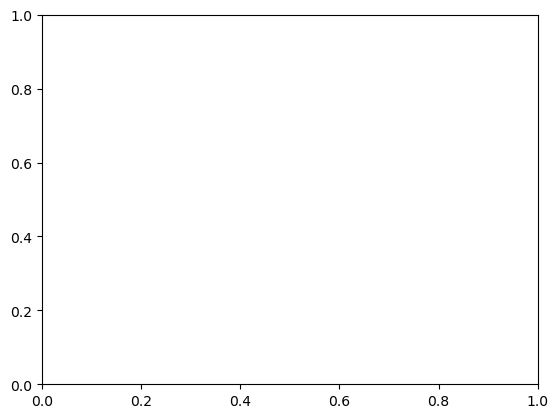

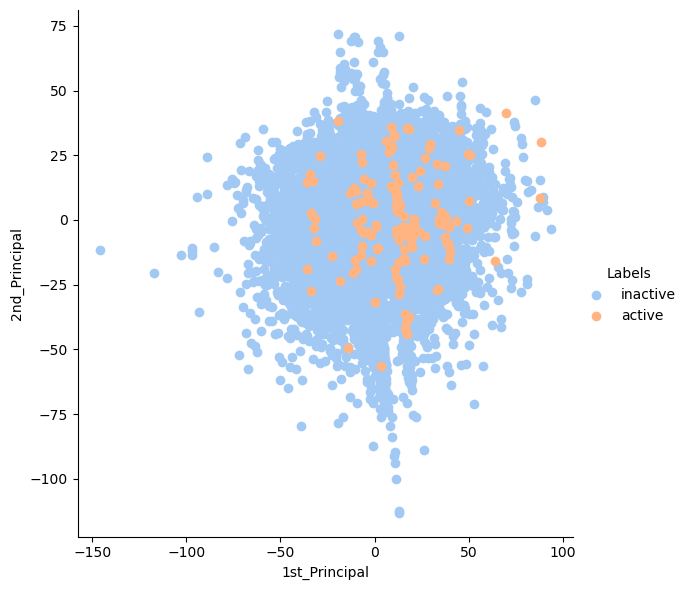

In [46]:
import mpld3
fig, ax = plt.subplots()

scatter = sns.FacetGrid(df, palette='pastel', hue="Labels", height=6).map(plt.scatter, '1st_Principal', '2nd_Principal').add_legend()
#fig = plt.gcf()

# attempt 1 to hover-label points on plot with mpld3
tooltip = mpld3.plugins.PointLabelTooltip(fig, labels=list(df.Labels))
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print("shape of the reduced PCA = ", pca_data.shape)
pca_data = np.vstack((pca_data.T, labels)).T

# new dataframe to plot the PCA results
pca_df = pd.DataFrame(pca_data, columns=("1st_Principal", "2nd_Principal", "Labels"))
sns.FacetGrid(pca_df, palette='pastel', hue="Labels", height=6).map(plt.scatter, '1st_Principal', '2nd_Principal').add_legend()
plt.show()

In [ ]:
inacdata=data.loc[data.col5408<1,:]
inacdata

In [ ]:
inacdata.describe()

In [7]:
mydata = data.loc[:, :1352]
mydata

,0,1,2,3,4,5,6,7,8,9,...,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.004806,0.016,0.189,0.028,0.028,0.189,0.036,0.048,0.051,0.044
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,0.018056,-0.266,-0.089,-0.254,0.093,0.093,0.002,0.017,0.052,0.077
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,-0.004056,0.022,0.192,0.026,0.038,0.194,0.035,0.076,0.063,0.050
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,-0.033139,0.055,0.221,0.029,0.081,0.226,0.043,0.369,0.121,0.062
5,-0.154,0.005,-0.011,-0.013,-0.002,-0.115,0.005,0.002,-0.003,0.002,...,0.029861,-0.001,-0.073,0.010,-0.004,0.005,-0.007,-0.014,-0.005,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16767,-0.175,-0.036,0.005,-0.050,-0.065,-0.041,0.047,0.012,0.003,-0.019,...,-0.022028,0.035,0.208,0.037,0.053,0.216,0.054,0.093,0.093,0.069
16768,-0.158,-0.000,-0.015,-0.021,-0.004,-0.106,0.010,0.006,0.001,0.002,...,0.025972,-0.002,0.043,0.020,0.002,0.002,0.006,0.004,0.007,0.019
16769,-0.174,-0.024,0.026,-0.044,-0.061,-0.097,0.049,0.007,0.001,-0.033,...,-0.047528,0.033,0.211,0.042,0.049,0.227,0.070,0.066,0.106,0.087
16770,-0.184,-0.072,-0.018,-0.091,-0.110,0.020,0.098,0.036,0.028,-0.023,...,-0.051111,0.065,0.234,0.049,0.106,0.258,0.077,0.198,0.174,0.108


In [8]:
mydata['result'] = data['col5408']

In [9]:
mydata.head()

,0,1,2,3,4,5,6,7,8,9,...,1344,1345,1346,1347,1348,1349,1350,1351,1352,result
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.016,0.189,0.028,0.028,0.189,0.036,0.048,0.051,0.044,0.0
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,-0.266,-0.089,-0.254,0.093,0.093,0.002,0.017,0.052,0.077,0.0
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.022,0.192,0.026,0.038,0.194,0.035,0.076,0.063,0.050,0.0
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.055,0.221,0.029,0.081,0.226,0.043,0.369,0.121,0.062,0.0
5,-0.154,0.005,-0.011,-0.013,-0.002,-0.115,0.005,0.002,-0.003,0.002,...,-0.001,-0.073,0.010,-0.004,0.005,-0.007,-0.014,-0.005,0.001,0.0


<AxesSubplot:>

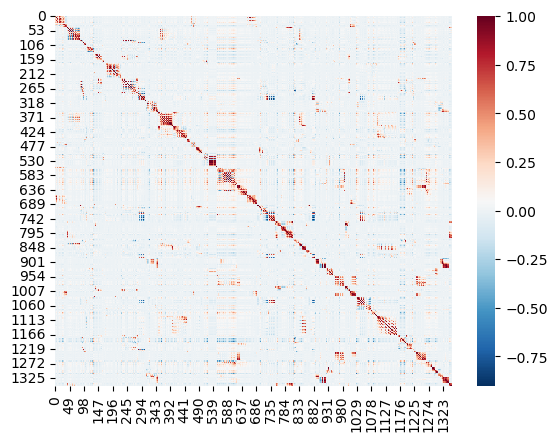

In [10]:
corr = mydata.corr()
sns.heatmap(corr,cmap='RdBu_r')

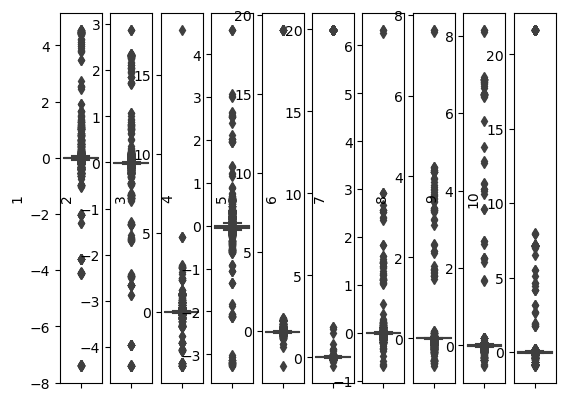

In [29]:
for col in range(10):
    plt.subplot(1,10,col+1)
    sns.boxplot(data=data, y=col+1)

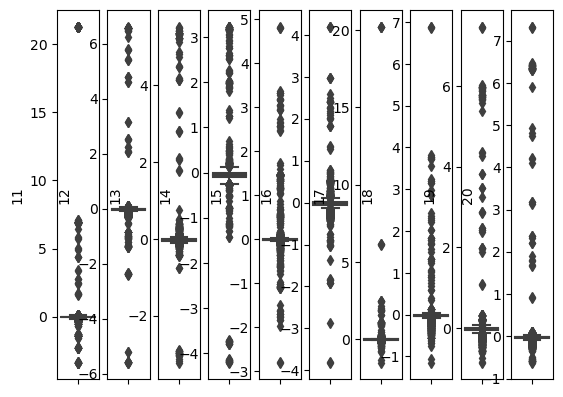

In [35]:
for col in range(10,20):
    plt.subplot(1,10,col-9)
    sns.boxplot(data=data, y=col+1)

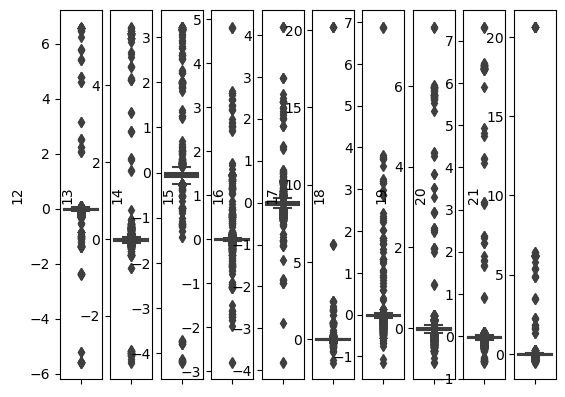

In [23]:
for col in range(11,21):
    plt.subplot(1,10,col-10)
    sns.boxplot(data=data, y=col+1)